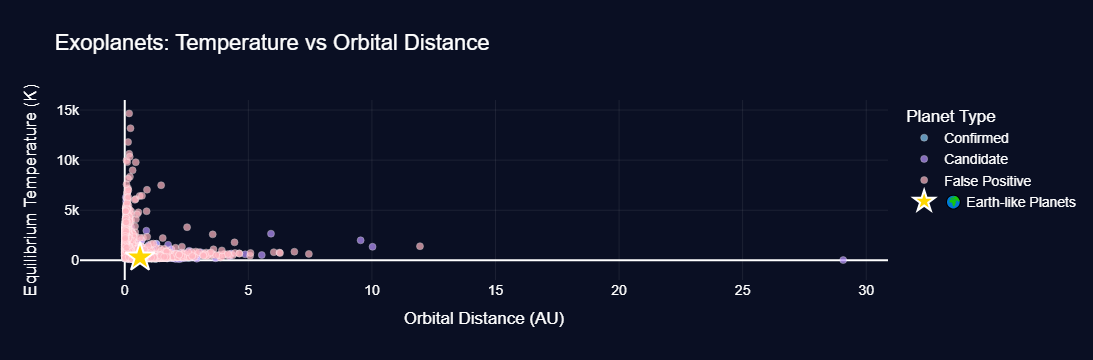

In [83]:
import pandas as pd
import plotly.graph_objects as go

# -------------------------------
# Load dataset
# -------------------------------
df = pd.read_csv("kepler_work.csv")

# -------------------------------
# Compute stellar and orbital parameters
# -------------------------------
T_sun = 5778  # Sun’s effective temperature (K)
df['stellar_mass'] = (df['koi_srad'] ** 2) * (df['koi_steff'] / T_sun) ** 4
P_years = df['koi_period'] / 365.25
df['a_au'] = (P_years ** 2 * df['stellar_mass']) ** (1/3)

# Remove invalid rows
df_valid = df.dropna(subset=['koi_period', 'koi_steff', 'koi_srad', 'a_au', 'koi_teq', 'koi_prad', 'koi_insol', 'koi_disposition'])

# -------------------------------
# Filter Earth-like planets
# -------------------------------
earth_like = df_valid[
    (df_valid['koi_prad'].between(0.8, 1.6)) &
    (df_valid['koi_teq'].between(250, 320)) &
    (df_valid['koi_insol'].between(0.25, 2.5)) &
    (df_valid['a_au'].between(0.5, 2.0)) &
    (df_valid['koi_disposition'] == 'CONFIRMED')
]

# Hover text for Earth-like planets
earth_hover_text = [
    f"ID: {row.kepid}<br>Radius: {row.koi_prad:.2f} Earths<br>Teq: {row.koi_teq:.0f} K<br>Distance: {row.a_au:.2f} AU"
    for row in earth_like.itertuples()
]

# -------------------------------
# Galaxy-style scatter plot
# -------------------------------
color_confirmed = 'rgb(135, 206, 250)'   # cyan
color_candidate = 'rgb(186, 148, 255)'   # lavender
color_falsepos  = 'rgb(255, 182, 193)'   # soft pink
color_earthlike = 'rgb(255, 215, 0)'     # gold star

confirmed = df_valid[df_valid['koi_disposition'] == 'CONFIRMED']
candidate = df_valid[df_valid['koi_disposition'] == 'CANDIDATE']
falsepos  = df_valid[df_valid['koi_disposition'] == 'FALSE POSITIVE']

fig = go.Figure()

fig.add_scatter(
    x=confirmed['a_au'], y=confirmed['koi_teq'],
    mode='markers',
    marker=dict(size=7, color=color_confirmed, opacity=0.7, line=dict(width=0.5, color='white')),
    name='Confirmed'
)

fig.add_scatter(
    x=candidate['a_au'], y=candidate['koi_teq'],
    mode='markers',
    marker=dict(size=7, color=color_candidate, opacity=0.7, line=dict(width=0.5, color='white')),
    name='Candidate'
)

fig.add_scatter(
    x=falsepos['a_au'], y=falsepos['koi_teq'],
    mode='markers',
    marker=dict(size=7, color=color_falsepos, opacity=0.7, line=dict(width=0.5, color='white')),
    name='False Positive'
)

fig.add_scatter(
    x=earth_like['a_au'],
    y=earth_like['koi_teq'],
    mode='markers',
    marker=dict(
        size=22,
        color=color_earthlike,
        symbol='star',
        line=dict(width=2, color='white')
    ),
    text=earth_hover_text,
    hoverinfo="text",
    name='🌍 Earth-like Planets'
)

fig.update_layout(
    title='Exoplanets: Temperature vs Orbital Distance',
    xaxis_title='Orbital Distance (AU)',
    yaxis_title='Equilibrium Temperature (K)',
    font=dict(family='Orbitron, Arial', size=14, color='white'),
    plot_bgcolor='rgb(10, 15, 35)',
    paper_bgcolor='rgb(10, 15, 35)',
    legend_title_text='Planet Type',
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.08)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.08)'),
    title_font=dict(size=22, color='white')
)

fig.show()


In [21]:
import pandas as pd

df = pd.read_csv("kepler_work.csv")
print(df.columns.tolist())



['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag']


In [35]:
df[['koi_period', 'koi_steff', 'koi_srad']].describe()
print("Missing values:")
print(df[['koi_period', 'koi_steff', 'koi_srad']].isna().sum())


Missing values:
koi_period      0
koi_steff     272
koi_srad      272
dtype: int64


In [30]:
import numpy as np

# Constants
T_sun = 5778  # Sun's temperature in K

# Compute stellar mass in solar masses (approximation)
df['stellar_mass'] = (df['koi_srad'] ** 2) * (df['koi_steff'] / T_sun) ** 4

# Convert orbital period from days to years
P_years = df['koi_period'] / 365.25

# Compute semi-major axis in AU (from Kepler’s 3rd law)
df['a_au'] = (P_years ** 2 * df['stellar_mass']) ** (1/3)


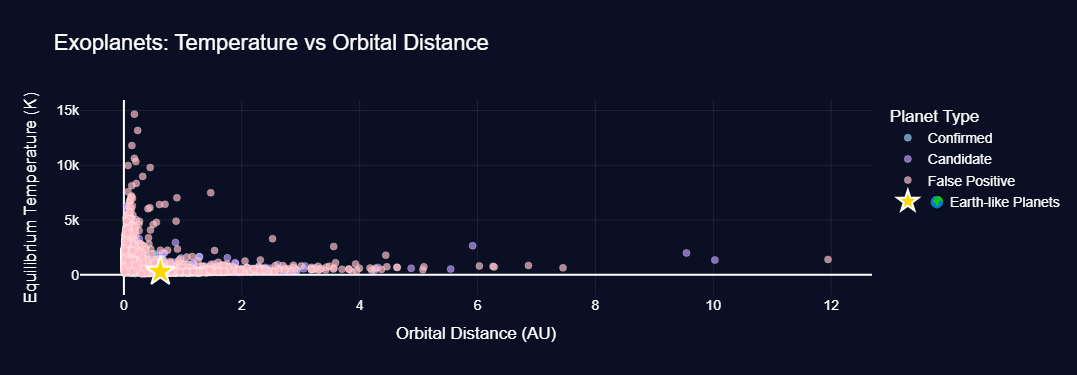

In [81]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# --- Galaxy color palette ---
color_confirmed = 'rgb(135, 206, 250)'   # starlight cyan
color_candidate = 'rgb(186, 148, 255)'   # nebula lavender
color_falsepos  = 'rgb(255, 182, 193)'   # soft rose-pink
color_earthlike = 'rgb(255, 215, 0)'     # gold star

# Filter subsets
confirmed = df_valid[df_valid['koi_disposition'] == 'CONFIRMED']
candidate = df_valid[df_valid['koi_disposition'] == 'CANDIDATE']
falsepos  = df_valid[df_valid['koi_disposition'] == 'FALSE POSITIVE']

# --- Add planet categories ---
fig.add_scatter(
    x=confirmed['a_au'], y=confirmed['koi_teq'],
    mode='markers',
    marker=dict(size=7, color=color_confirmed, opacity=0.7, line=dict(width=0.5, color='white')),
    name='Confirmed'
)

fig.add_scatter(
    x=candidate['a_au'], y=candidate['koi_teq'],
    mode='markers',
    marker=dict(size=7, color=color_candidate, opacity=0.7, line=dict(width=0.5, color='white')),
    name='Candidate'
)

fig.add_scatter(
    x=falsepos['a_au'], y=falsepos['koi_teq'],
    mode='markers',
    marker=dict(size=7, color=color_falsepos, opacity=0.7, line=dict(width=0.5, color='white')),
    name='False Positive'
)

# --- Add Earth-like planets (keep the star!) ---
fig.add_scatter(
    x=earth_like['a_au'],
    y=earth_like['koi_teq'],
    mode='markers',
    marker=dict(
        size=22,                       # increased from 14 to 22
        color=color_earthlike,
        symbol='star',
        line=dict(width=2, color='white')
    ),
    text=earth_hover_text,
    hoverinfo="text",
    name=' Earth-like Planets'
)

# --- Layout: galaxy theme ---
fig.update_layout(
    title='Exoplanets: Temperature vs Orbital Distance',
    xaxis_title='Orbital Distance (AU)',
    yaxis_title='Equilibrium Temperature (K)',
    font=dict(family='Orbitron, Arial', size=14, color='white'),
    plot_bgcolor='rgb(10, 15, 35)',   # deep galaxy blue
    paper_bgcolor='rgb(10, 15, 35)',
    legend_title_text='Planet Type',
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.08)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.08)'),
    title_font=dict(size=22, color='white')
)

fig.show()


In [67]:
df.columns = df.columns.str.strip()

cols = [
    'kepid', 'koi_tce_plnt_num', 'koi_period', 'koi_disposition',
    'koi_teq', 'koi_prad', 'koi_insol', 'koi_score',
    'koi_steff', 'koi_srad'
]
df = df[cols]


# Drop rows with missing critical values
df = df.dropna(subset=['koi_period', 'koi_tce_plnt_num', 'koi_disposition'])


In [15]:
# Step 1: Initialize default column
df['position_in_system'] = 'single'  # default

# Step 2: Handle multi-planet systems
multi = df.groupby('kepid')['koi_period'].transform('count') > 1
df_multi = df[multi].copy()

# Step 3: Sort planets within each system by period and assign positions
df_multi['rank'] = df_multi.groupby('kepid')['koi_period'].rank(method='first')

def get_position(sub):
    n = len(sub)
    if n == 2:
        return ['inner', 'outer']
    elif n >= 3:
        pos = ['inner'] + ['middle']*(n-2) + ['outer']
        return pos
    else:
        return ['single']*n  # fallback

df_multi = df_multi.groupby('kepid', group_keys=False).apply(
    lambda g: g.assign(position_in_system=get_position(g))
)

# Step 4: Update the original df
df.update(df_multi)

# Step 5: Check counts
print(df['position_in_system'].value_counts())


position_in_system
single    7085
inner      877
outer      877
middle     379
Name: count, dtype: int64


C:\Users\TaifN\AppData\Local\Temp\ipykernel_14340\1594566874.py:21: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [68]:
earth_like = df[
    (df['koi_prad'].between(0.8, 1.5)) &
    (df['koi_teq'].between(250, 320)) &
    (df['koi_insol'].between(0.25, 2.0)) &
    (df['a_au'].between(0.75, 1.5)) &
    (df['koi_disposition'] == 'CONFIRMED')
]


KeyError: 'a_au'

In [27]:
print(df.columns.tolist())
print(earth_like.shape)      # Number of rows and columns
print(earth_like.columns) 


['kepid', 'koi_tce_plnt_num', 'koi_period', 'koi_disposition', 'koi_teq', 'koi_prad', 'koi_insol', 'koi_score', 'koi_steff', 'koi_srad']
(9, 10)
Index(['kepid', 'koi_tce_plnt_num', 'koi_period', 'koi_disposition', 'koi_teq',
       'koi_prad', 'koi_insol', 'koi_score', 'koi_steff', 'koi_srad'],
      dtype='object')


Number of Earth-like planets: 0


,kepid,koi_prad,koi_teq,koi_insol,a_au


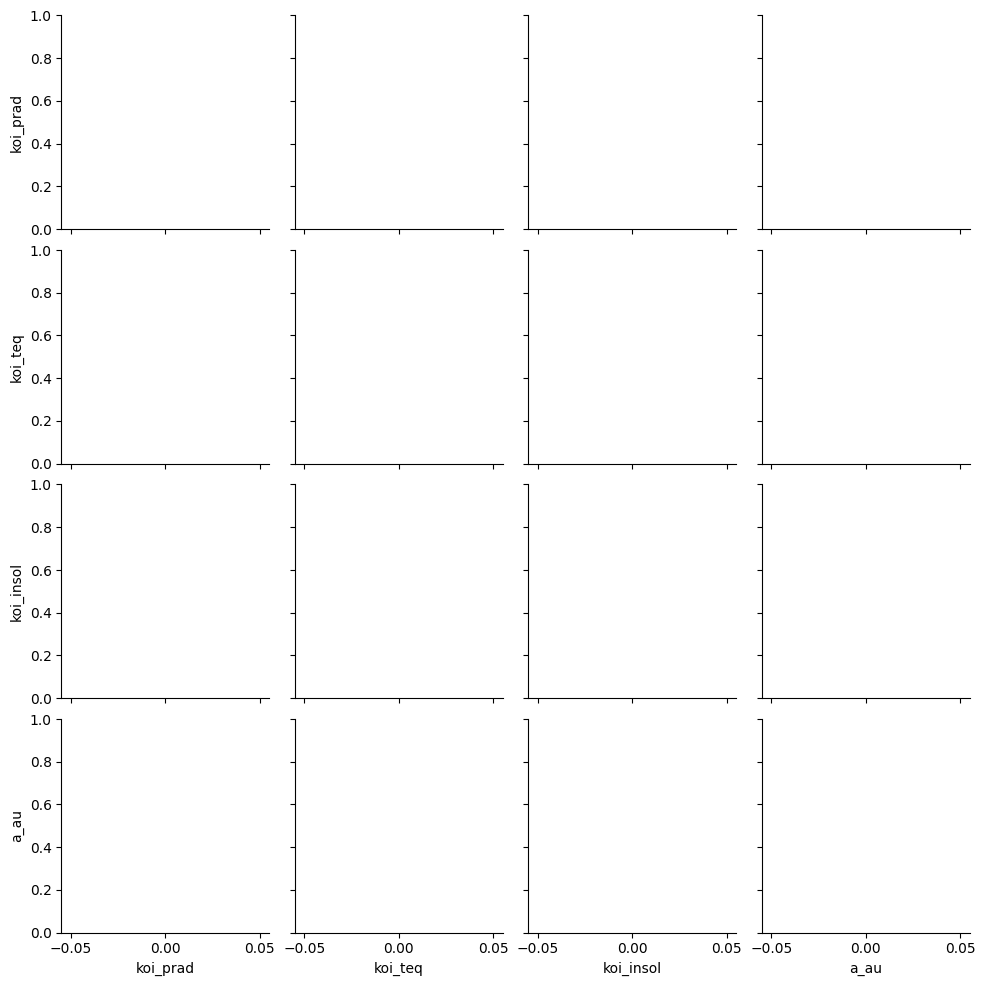

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Number of Earth-like planets:", len(earth_like))
display(earth_like[['kepid', 'koi_prad', 'koi_teq', 'koi_insol', 'a_au']])

sns.pairplot(earth_like[['koi_prad','koi_teq','koi_insol','a_au']])
plt.show()


In [ ]:
# Or correlation heatmap
corr = earth_like[['koi_prad','koi_teq','koi_period','koi_insol','koi_tce_plnt_num','koi_steff','koi_srad']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [37]:
########vlidation##########
import numpy as np

T_sun = 5778  # Sun's surface temperature in Kelvin

# Drop the rows that are missing key stellar parameters
df_valid = df.dropna(subset=['koi_period', 'koi_steff', 'koi_srad'])
df_valid = df_valid[df_valid['koi_srad'] > 0]

# Estimate stellar mass from radius and temperature
df_valid['stellar_mass'] = (df_valid['koi_srad'] ** 2) * (df_valid['koi_steff'] / T_sun) ** 4

# Convert orbital period to years
P_years = df_valid['koi_period'] / 365.25

# Estimate orbital distance in AU using Kepler's third law
df_valid['a_au'] = (P_years ** 2 * df_valid['stellar_mass']) ** (1/3)

# Preview the new column
df_valid[['kepid', 'koi_period', 'koi_steff', 'koi_srad', 'stellar_mass', 'a_au']].head(10)

df_valid[['koi_prad','koi_teq','koi_insol','a_au']].describe()



,koi_prad,koi_teq,koi_insol,a_au
count,8946.000000,8946.000000,8.946000e+03,8946.000000
mean,103.830303,1095.156942,7.635604e+03,0.263718
std,3117.152256,851.885406,1.601468e+05,0.527768
min,0.080000,92.000000,2.000000e-02,0.001202
25%,1.400000,553.000000,2.217250e+01,0.038777
50%,2.410000,888.000000,1.470100e+02,0.088535
75%,15.670000,1391.750000,8.860925e+02,0.226326
max,200346.000000,14667.000000,1.094755e+07,11.945434


In [44]:
earth_like = df_valid[
    (df_valid['koi_prad'].between(0.8, 1.6)) &
    (df_valid['koi_teq'].between(250, 320)) &
    (df_valid['koi_insol'].between(0.25, 2.5)) &
    (df_valid['a_au'].between(0.5, 2.0)) &
    (df_valid['koi_disposition'] == 'CONFIRMED')
]

print("Number of Earth-like planets:", len(earth_like))
earth_like[['kepid','koi_prad','koi_teq','koi_insol','a_au', 'koi_disposition']].head(20)


Number of Earth-like planets: 1


,kepid,koi_prad,koi_teq,koi_insol,a_au,koi_disposition
5671,9205938,1.45,305.0,2.06,0.618316,CONFIRMED


Number of Earth-like planets: 1


,kepid,koi_prad,koi_teq,koi_insol,koi_disposition
5671,9205938,1.45,305.0,2.06,CONFIRMED


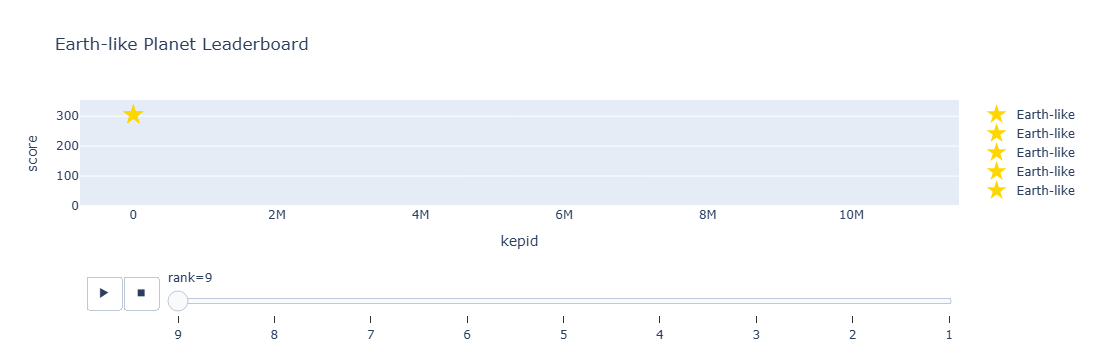

In [73]:
################ Star the earth like - Create text for hover
earth_hover_text = (
    "kepid: " + earth_like['kepid'].astype(str) +
    "<br>Planet #: " + earth_like['koi_tce_plnt_num'].astype(str) +
    "<br>Disposition: " + earth_like['koi_disposition'] +
    "<br>Radius: " + earth_like['koi_prad'].astype(str) +
    "<br>Teq: " + earth_like['koi_teq'].astype(str) +
    "<br>Insolation: " + earth_like['koi_insol'].astype(str) +
    "<br>Star Temp: " + earth_like['koi_steff'].astype(str) +
    "<br>Star Radius: " + earth_like['koi_srad'].astype(str) +
    "<br>Distance (AU): " + earth_like['a_au'].astype(str)
)

# Add Earth-like planets with full hover info
fig.add_scatter(
    x=earth_like['a_au'],
    y=earth_like['koi_teq'],
    mode='markers',
    marker=dict(size=15, color='gold', symbol='star'),
    text=earth_hover_text,
    hoverinfo="text",
    name='Earth-like'
)


In [55]:
# Filter for a specific star ID
star_data = df_valid[df_valid['kepid'] == 9205938]

# Show the data
print(star_data)


        kepid  koi_tce_plnt_num  koi_period koi_disposition  koi_teq  \
1914  9205938               1.0  108.593113       CONFIRMED    374.0   
5671  9205938               2.0  199.668760       CONFIRMED    305.0   

      koi_prad  koi_insol  koi_score  koi_steff  koi_srad  stellar_mass  \
1914      1.68       4.64       1.00     5678.0     0.921      0.791026   
5671      1.45       2.06       0.92     5678.0     0.921      0.791026   

          a_au  
1914  0.411976  
5671  0.618316  


In [56]:
import pandas as pd

# Suppose this is your preliminary candidates
leaderboard = earth_like_candidates.copy()  # 9 rows
# Add a score column (optional) to rank them, e.g., based on closeness to Earth
# Higher score = more Earth-like
leaderboard['score'] = (1 / abs(leaderboard['koi_prad'] - 1) +
                        1 / abs(leaderboard['koi_teq'] - 288) +
                        1 / abs(leaderboard['koi_insol'] - 1))
# Sort by score descending
leaderboard = leaderboard.sort_values(by='score', ascending=False).reset_index(drop=True)
leaderboard['rank'] = leaderboard.index + 1


NameError: name 'earth_like_candidates' is not defined

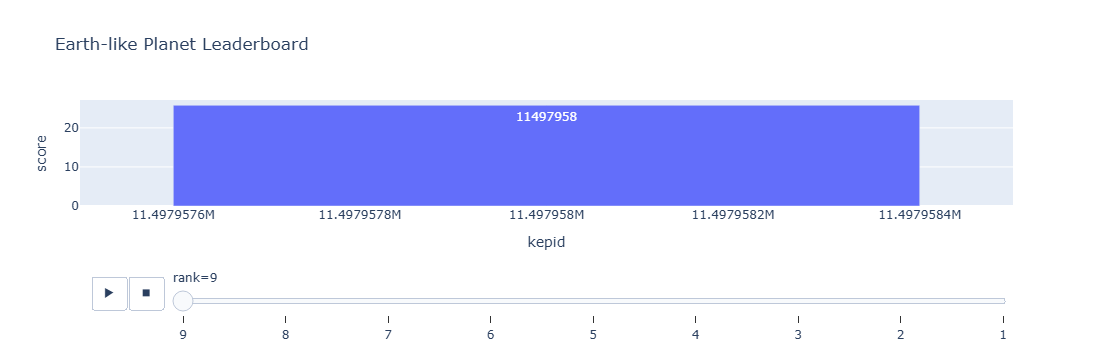